In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import configuration location and filepath
from myconfig import *


In [2]:
#get csv files
#out: merged_df.to_csv("../data/4min_pass_wave_salt_temp.csv", index=True)

data_location_01 = output_path_ecco + "trench_dive_temperature.csv"
data_location_02 = output_path_ecco + "trench_dive_salinity.csv"
data_location_03 = output_path_ecco + "trench_dive_current_U.csv"
data_location_04 = output_path_ecco + "trench_dive_current_V.csv"
data_location_05 = output_path_ecco + "trench_dive_current_W.csv"
data_location_06 = output_path_nrt + "buoy_nrt.csv"
data_location_07 = output_path_nrt + "seismic_7200.csv"
data_location_08 = output_path_dolphin + "dolphins_01.csv"
data_location_09 = output_path_nrt + "nrt_raining.csv"
data_location_10 = output_path_nrt + "goes_timeseries_nrt.csv"
data_location_11 = output_path_dolphin + "dolphins.csv"

df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)
df_buoy = pd.read_csv(data_location_06)
df_seismic = pd.read_csv(data_location_07)
df_creatures = pd.read_csv(data_location_08)
df_rain = pd.read_csv(data_location_09)
df_clouds = pd.read_csv(data_location_10)
df_dolphins = pd.read_csv(data_location_11)

In [3]:
# Function for min-max normalization per column
def min_max_normalize_column(df):
    return df.apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)

# Load the CSV files into DataFrames
df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)

#get pressure
# Constants
rho = 1025  # kg/m³, density of seawater
g = 9.81  # m/s², gravitational acceleration
P0 = 101325  # Pa, atmospheric pressure at sea level

# Calculate pressure in Pascals using the absolute value of the depth
df_temp['Pressure'] = P0 + rho * g * abs(df_temp['depth'])

# List of the original DataFrames
dfs = [df_temp, df_salinity, df_U, df_V, df_W]

# Process each DataFrame
new_dfs = []
for df in dfs:
    # Normalize each column in the DataFrame using min-max normalization
    normalized_df = min_max_normalize_column(df)
    
    # Get the first row of the original DataFrame
    first_values = normalized_df.iloc[0]
    
    # Create a new DataFrame with 7200 rows
    # Fill the first 1800 rows with the first value of each respective column
    new_df = pd.DataFrame(index=range(7200), columns=df.columns)

    # Assign the first 1800 rows with the first values of the original DataFrame columns
    new_df.iloc[:1800] = first_values

    # Insert the normalized data starting from index 1800
    new_df.iloc[1800:1800 + len(normalized_df), :] = normalized_df.values

    # Eliminate NaN (forward fill)
    new_df = new_df.ffill()
    
    # Append the new DataFrame to the list
    new_dfs.append(new_df)

# Unpack the new DataFrames into respective variables
new_df_temp, new_df_salinity, new_df_U, new_df_V, new_df_W = new_dfs


/tmp/ipykernel_19870/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.ffill()
/tmp/ipykernel_19870/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.ffill()
/tmp/ipykernel_19870/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.ffill()
/tmp/ipykerne

In [4]:
df_temp['Pressure'].max()

40514430.3548584

In [5]:
new_df_W.head()

,Unnamed: 0,depth,W
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0


/tmp/ipykernel_19870/3022958768.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)


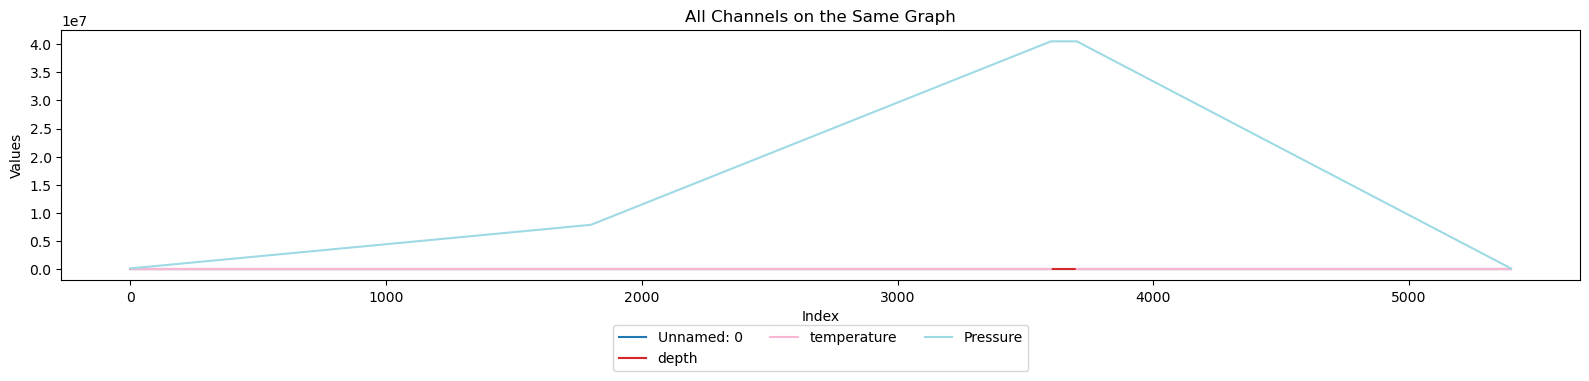

In [6]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(df_temp.columns):
    ax1.plot(df_temp.index, df_temp[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Add a combined legend for all columns and place it below the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(normalized_df.columns))

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
#plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [7]:
new_df_salinity.head()

,Unnamed: 0,depth,salinity
0,0.0,1.0,0.837472
1,0.0,1.0,0.837472
2,0.0,1.0,0.837472
3,0.0,1.0,0.837472
4,0.0,1.0,0.837472


In [8]:
df_buoy.head()

,Timestamp,WDIR,WSPD,GST,WVHT,APD,ATMP,WTMP,sun_exposure
0,2024-10-18 17:30:00.000000000,0.14736,0.833333,0.778242,0.85,0.193548,0.391304,0.833333,54.945129
1,2024-10-18 17:31:23.178219264,0.14736,0.833333,0.769942,0.85,0.193548,0.391304,0.810228,54.755094
2,2024-10-18 17:32:46.356438272,0.14736,0.833333,0.761643,0.85,0.193548,0.391304,0.787123,54.565059
3,2024-10-18 17:34:09.534657536,0.14736,0.833333,0.753343,0.85,0.193548,0.391304,0.764018,54.375025
4,2024-10-18 17:35:32.712876800,0.14736,0.833333,0.745044,0.85,0.193548,0.391304,0.740913,54.184990


In [9]:
#dolphin sidequest
df_dolphins = df_dolphins[["Lizzy_angle","Perry_angle","BentHighNick_angle"]]
df_dolphins = df_dolphins.astype(float)
df_dolphins.fillna(0.0, inplace=True)
df_dolphins_normalized = min_max_normalize_column(df_dolphins)

# Remove rows where all three specified columns are 0.0
filtered_df_dolphins = df_dolphins_normalized[~((df_dolphins_normalized["Lizzy_angle"] == 0.0) & (df_dolphins_normalized["Perry_angle"] == 0.0) & (df_dolphins_normalized["BentHighNick_angle"] == 0.0))]

# Reset the index to reindex the DataFrame
filtered_df_dolphins = filtered_df_dolphins.reset_index(drop=True)

# Step 1: Create a DataFrame with 7200 rows and 3 columns, all filled with 0.0
buffered_df_dolphins = pd.DataFrame(0.0, index=range(7200), columns=filtered_df_dolphins.columns)

# Step 2: Copy the data from `filtered_df_dolphins` starting at row 2541
buffered_df_dolphins.iloc[2541:2541+len(filtered_df_dolphins)] = filtered_df_dolphins.values

# The final DataFrame `buffered_df_dolphins` will have the required structure
buffered_df_dolphins.shape

(7200, 3)

In [10]:
col1 = new_df_temp['depth']  # normalize
col2 = new_df_temp['Pressure']  # normalize
col3 = new_df_temp['temperature']  # normalize
col4 = new_df_salinity['salinity'] # normalize
col5 = new_df_U['U'] 
col6 = new_df_V['current']
col7 = new_df_W['W']

col8 = df_buoy['WVHT'] 
col9 = df_buoy['ATMP'] 
col10 = df_buoy['WSPD'] 
col11 = df_seismic['Sample'] #note space
col12 = df_buoy['sun_exposure']*df_buoy['WSPD']

col13 = df_rain['rain']
# Select the columns from df_clouds
col14 = df_clouds[["N", "NE", "E", "SE", "S", "SW", "W", "NW"]]

col15 = buffered_df_dolphins[["Lizzy_angle","Perry_angle","BentHighNick_angle"]]

merged_df = pd.DataFrame({'depth': col1, 'pressure': col2, 'temperature': col3, 'glitter':col12})
normalized_df = merged_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#add ECCO Model, already normalized: 
normalized_df['salinity'] = col4
normalized_df['U_current'] = col5
normalized_df['V_current'] = col6 
normalized_df['W_current'] = col7

#add buoy, already normalized
normalized_df["buoy_height"] = col8
normalized_df["buoy_temp"] = col9 
normalized_df["buoy_windspeed"] = col10
#add Seismic, already normalized
normalized_df["seismic"] = col11
#add Rain, already normalized
normalized_df["rain"] = col13
#add Clouds, already normalized
# Assign them to normalized_df
normalized_df[["N", "NE", "E", "SE", "S", "SW", "W", "NW"]] = col14

normalized_df[["Lizzy","Perry","BentHighNick"]] = col15

normalized_df.fillna(0.0, inplace=True)

In [11]:
df_buoy.head(10)

,Timestamp,WDIR,WSPD,GST,WVHT,APD,ATMP,WTMP,sun_exposure
0,2024-10-18 17:30:00.000000000,0.14736,0.833333,0.778242,0.85,0.193548,0.391304,0.833333,54.945129
1,2024-10-18 17:31:23.178219264,0.14736,0.833333,0.769942,0.85,0.193548,0.391304,0.810228,54.755094
2,2024-10-18 17:32:46.356438272,0.14736,0.833333,0.761643,0.85,0.193548,0.391304,0.787123,54.565059
3,2024-10-18 17:34:09.534657536,0.14736,0.833333,0.753343,0.85,0.193548,0.391304,0.764018,54.375025
4,2024-10-18 17:35:32.712876800,0.14736,0.833333,0.745044,0.85,0.193548,0.391304,0.740913,54.184990
5,2024-10-18 17:36:55.891096064,0.14736,0.833333,0.736744,0.85,0.193548,0.391304,0.717808,53.994955
6,2024-10-18 17:38:19.069315072,0.14736,0.833333,0.728445,0.85,0.193548,0.391304,0.694703,53.804920
7,2024-10-18 17:39:42.247534336,0.14736,0.833333,0.720145,0.85,0.193548,0.391304,0.671598,53.614886
8,2024-10-18 17:41:05.425753600,0.14736,0.842420,0.751015,0.85,0.193548,0.369970,0.666667,53.412825
9,2024-10-18 17:42:28.603972864,0.14736,0.853973,0.792512,0.85,0.193548,0.342847,0.666667,53.207502


/tmp/ipykernel_19870/419132999.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)


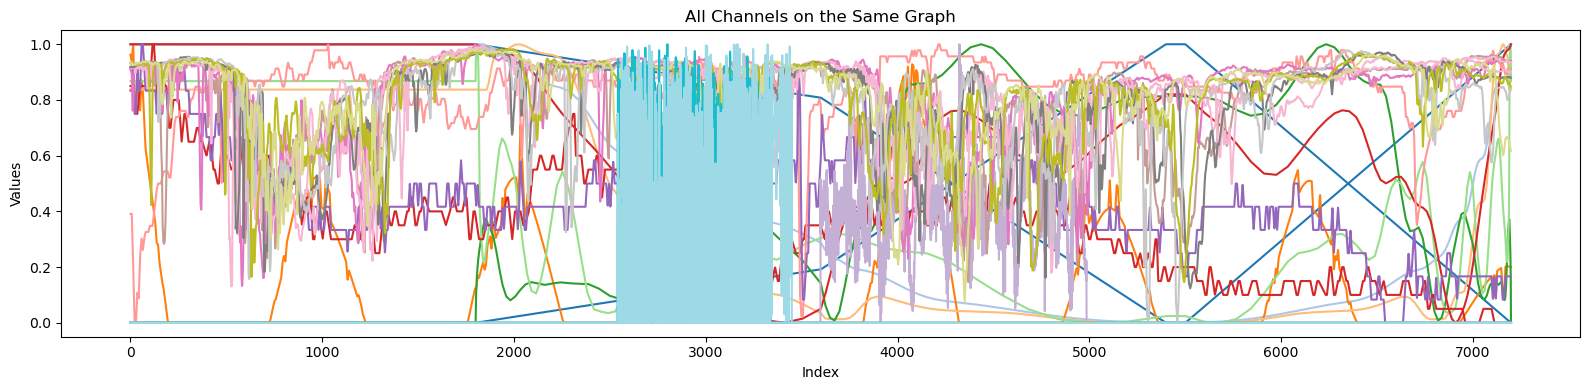

In [12]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(normalized_df.columns):
    ax1.plot(normalized_df.index, normalized_df[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig("./figures/dive_nrt.png")

# Display the plot
plt.show()


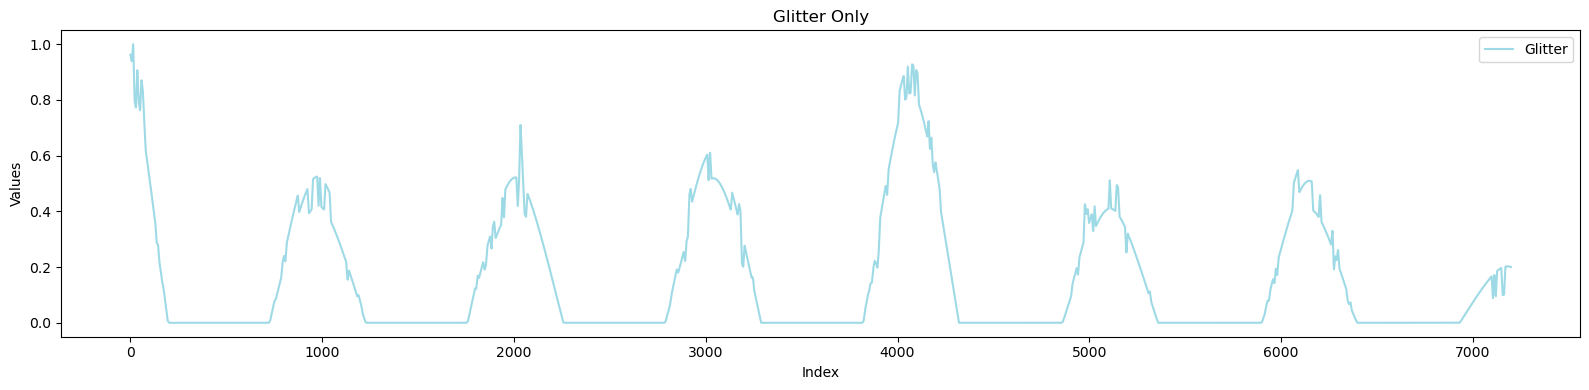

In [13]:
plt.figure(figsize=(16, 4))

# Plot the 'glitter' column from normalized_df
plt.plot(normalized_df.index, normalized_df["glitter"], color=colors(idx), label="Glitter")

# Set labels for the x and y axes
plt.xlabel('Index')
plt.ylabel('Values')

# Set a title for the plot
plt.title('Glitter Only')

# Add a legend to the plot
plt.legend()

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure (uncomment the line below to save the image)
# plt.savefig("../img/dive.png")

# Display the plot
plt.show()

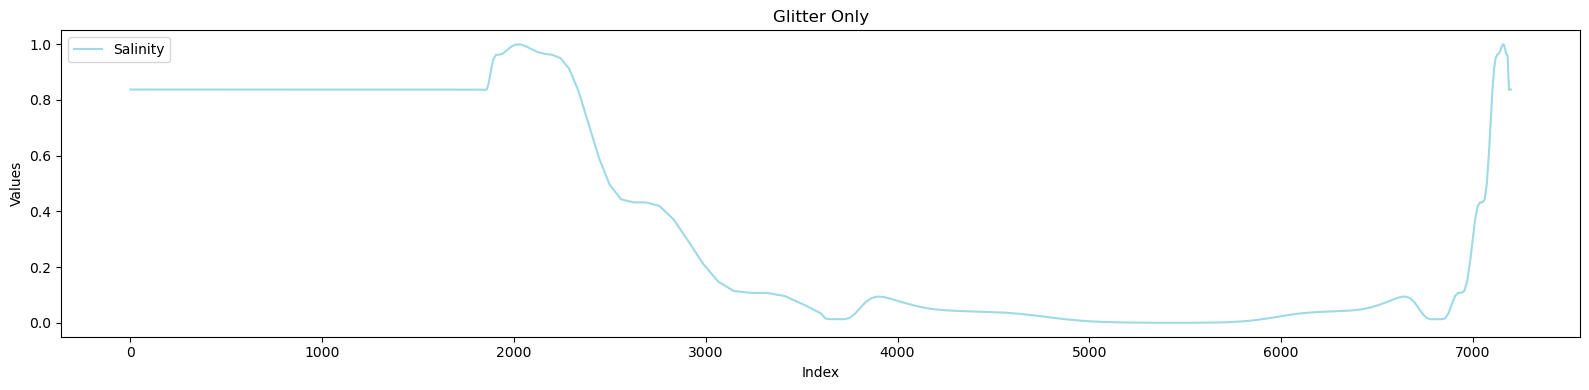

In [14]:
plt.figure(figsize=(16, 4))

# Plot the 'glitter' column from normalized_df
plt.plot(normalized_df.index, normalized_df["salinity"], color=colors(idx), label="Salinity")

# Set labels for the x and y axes
plt.xlabel('Index')
plt.ylabel('Values')

# Set a title for the plot
plt.title('Glitter Only')

# Add a legend to the plot
plt.legend()

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure (uncomment the line below to save the image)
# plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [15]:
normalized_df.head(10)

,depth,pressure,temperature,glitter,salinity,U_current,V_current,W_current,buoy_height,buoy_temp,...,NE,E,SE,S,SW,W,NW,Lizzy,Perry,BentHighNick
0,1.0,0.0,0.999427,0.962427,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.909969,0.917626,0.919449,0.917392,0.934221,0.931798,0.930964,0.0,0.0,0.0
1,1.0,0.0,0.999427,0.959098,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.909969,0.917626,0.919449,0.917392,0.934221,0.931798,0.930964,0.0,0.0,0.0
2,1.0,0.0,0.999427,0.955769,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.907602,0.917626,0.920396,0.917155,0.933984,0.931798,0.931911,0.0,0.0,0.0
3,1.0,0.0,0.999427,0.952441,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.905234,0.917626,0.921343,0.916919,0.933748,0.931798,0.932858,0.0,0.0,0.0
4,1.0,0.0,0.999427,0.949112,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.902510,0.917745,0.921701,0.917036,0.933511,0.931562,0.933216,0.0,0.0,0.0
5,1.0,0.0,0.999427,0.945783,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.898707,0.918220,0.920275,0.918224,0.933273,0.930611,0.931790,0.0,0.0,0.0
6,1.0,0.0,0.999427,0.942455,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.894904,0.918695,0.918849,0.919412,0.933035,0.929661,0.930363,0.0,0.0,0.0
7,1.0,0.0,0.999427,0.939126,0.837472,0.0,0.867684,1.0,0.85,0.391304,...,0.891102,0.919170,0.917423,0.920601,0.932797,0.928710,0.928937,0.0,0.0,0.0
8,1.0,0.0,0.999427,0.945789,0.837472,0.0,0.867684,1.0,0.85,0.369970,...,0.870879,0.919892,0.916494,0.920675,0.933178,0.928379,0.927761,0.0,0.0,0.0
9,1.0,0.0,0.999427,0.955073,0.837472,0.0,0.867684,1.0,0.85,0.342847,...,0.835602,0.920839,0.916020,0.919728,0.934125,0.928616,0.926814,0.0,0.0,0.0


In [16]:
file_name = output_path_nrt + '12min_pass_v08.csv' 
normalized_df.to_csv(file_name, index=True)